In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
hourly = pd.read_csv(r'C:\Users\hhamadeh\Documents\Datasets\Seattle Bicycle Traffic\FremontHourly.csv',
                    index_col = 'Date', parse_dates=True)

In [13]:
hourly.head()

,Fremont Bridge NB,Fremont Bridge SB
Date,,
2012-10-02 00:00:00,0.0,0.0
2012-10-02 01:00:00,0.0,0.0
2012-10-02 02:00:00,0.0,0.0
2012-10-02 03:00:00,0.0,0.0
2012-10-02 04:00:00,0.0,0.0


In [14]:
# Relabel Columns; Total traffic

hourly.columns = ['northbound', 'southbound']
hourly['total'] = hourly['northbound'] + hourly['southbound']

In [20]:
# Resample time series data into daily and weekly totals

daily = hourly.resample('d').sum()
weekly = hourly.resample('w').sum()

Text(0,0.5,'Number of Riders')

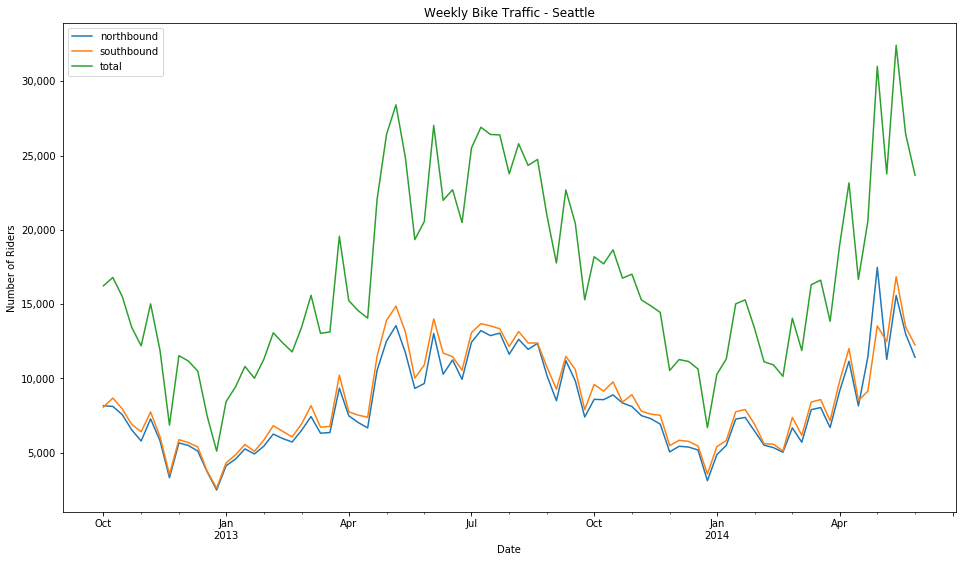

In [34]:
# Plot daily vs weekly vs total

t = weekly[['northbound', 'southbound', 'total']].plot(kind='line', figsize=(16, 9), title='Weekly Bike Traffic - Seattle')
t.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.ylabel('Number of Riders')

The winter months see the lowest traffic, while the summer months have nearly 6x more traffic. It's kind of hard to see if there is an increasing trend year-over-year though. 

May 2015 sees roughly 35,000 bikes.

We can create a <font color='blue'>__moving window average__</font> to see more detail. This will essentially take the average of a 30 day window around each date.

Text(0,0.5,'Average Number of Riders')

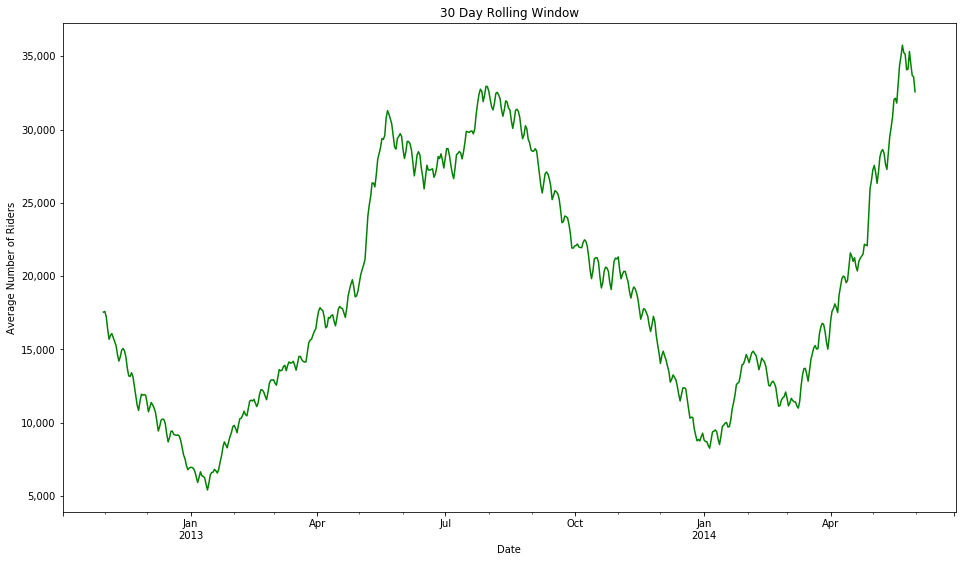

In [50]:
r = daily['total'].rolling(30).mean().plot(kind='line', color='g',
                                           figsize=(16, 9), title='30 Day Rolling Window')
r.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.ylabel('Average Number of Riders')

Now we can see more of an increasing trend. January vs January has an increase as does May vs May. There is still a seasonal flux which is expected, but 2014 does have more riders than 2013.

### Hours of Daylight

The seasonal flux can probably be accounted for by better weather and more hours of sunlight.

In [55]:
def daylightHours(date, axis=23.44, latitude=47.61):
    """Return hours of daylight for given date"""
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day = day % 365.25
    m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
    m = max(0, min(m, 2))
    
    return 24. * np.degrees(np.arccos(1 - m)) / 180.


# Add to dataframes
weekly['daylight'] = list(map(daylightHours, weekly.index))
daily['daylight'] = list(map(daylightHours, daily.index))

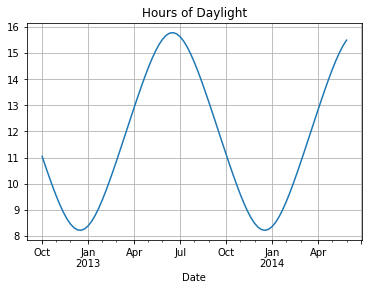

In [62]:
weekly['daylight'].plot(kind='line', grid=True, figsize=(6, 4), title='Hours of Daylight')

January sees ~8 hours of daylight while the tail end of June sees ~16 hours of daylight

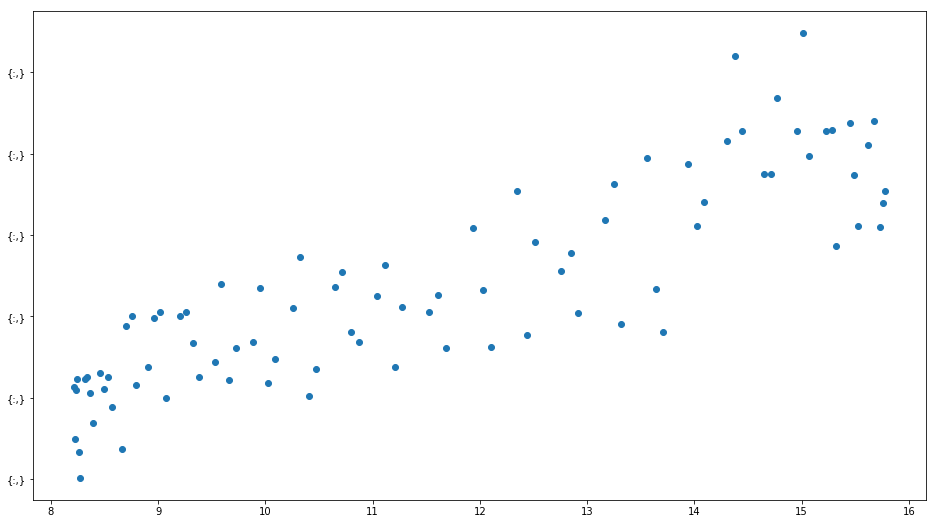

In [77]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(16, 9))
# plt.figure(figsize=(16, 9))
plt.scatter(weekly['daylight'], weekly['total'])
ax.yaxis.set_major_formatter(FormatStrFormatter('{:,}'))

# plt.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
# plt.title('Daylight vs Total Bicycle Traffic')
# plt.xlabel('Hours of Daylight')
# plt.ylabel('Number of Riders')

In [76]:
'{:,}'.format(1234)

'1,234'